In [1]:
using Plots, LinearAlgebra, BenchmarkTools, LaTeXStrings

In [2]:
function bisection(f::Function,     # 함수
    a::Real,                        # 구간값 1
    b::Real,                        # 구간값 2
    xtol::Real = 1.0e-8,            # 해의 오차의 허용 범위
    etol::Real = 1.0e-10)           # 해의 함수값의 허용 범위
    Niter = 0
    a, b = minmax(a, b)
    f(a)*f(b) <= 0 || error("f(a)*f(b) should be negative") 
    c = (a+b)/2
    while ((b-a) > 2*xtol) || (abs(f(c))<etol)
        Niter +=1
        
        if f(c) == 0.0
            break
        elseif f(a)*f(c) < 0 
            a, b = a, c
        else 
            a, b = c, b 
        end
        c = (a+b)/2
    end
    return c, Niter
end

function newton_method(f::Function, # 함수
    df::Function,                   # 도함수
    p::Real,                        # 시작값
    MaxIter::Int64=100_000,         # 최대 반복 횟수
    etol::Real = 1.0e-8,            # 해의 함수값의 허용 범위
    dfmin::Real = 1.0e-6)           # 미분값의 절대값의 허용되는 최소값
    
    Niter = 0
    for i in 1:MaxIter
        if abs(f(p)) < etol
            break
        elseif abs(df(p)) < dfmin 
            error("df ≈ 0.0")
        end
        p = p - f(p)/df(p)
        Niter += 1       
        
        if abs(f(p)) < etol 
            return (p, Niter)
        end
    end
    error("최대 반복 횟수 $MaxIter 에 도달하였으나 답을 찾지 못함")
end

function secant(f::Function,    # 함수
    p0::Real,                   # 시작값 1
    p1::Real,                   # 시작값 2
    MaxIter::Int64 = 100_000,   # 최대 반복 횟수
    etol::Real = 1.0e-8,        # 해의 함수값의 허용 범위
    dfmin::Real = 1.0e-6)       # 도함수의 근사값의 절대값에 허용되는 최소값
    
    Niter = 0
    
    for i in 1:MaxIter
        gx = (f(p1)-f(p0))/(p1-p0)
        if abs(f(p1)) < etol 
            return p1, Niter
        elseif abs(gx)<dfmin
            error("df ≈ 0.0")
        end
        p0, p1 = p1, p1 - f(p1)/gx
        Niter += 1
    end
    error("최대 반복 횟수 $MaxIter 에 도달하였으나 답을 찾지 못함.")
end

function regula_falci(f::Function,  # 함수
    a::Real,                        # 구간값 1
    b::Real,                        # 구간값 2
    MaxIter::Int64 = 100_000,       # 최대 반복 회수
    xtol::Real = 1.0e-8,            # 해의 오차의 허용 범위
    etol::Real = 1.0e-8,            # 해의 함수값의 허용 범위
    dfmin::Real = 1.0e-6)           # 도함수의 근사값의 절대값에 허용되는 최소값

    a, b = minmax(a, b)
    @assert f(a)*f(b) < 0

    Niter = 0

    for i in 1:MaxIter
        Niter +=1
        gx =  (f(b)-f(a))/(b-a)
        c = b-f(b)/gx
        if (abs(b-a)<xtol) || (abs(f(c))<etol)
            return c, Niter
        elseif abs(gx) < dfmin 
            error("df ≈ 0.0")
        end
        
        
        if f(b)*f(c) < 0 
            a, b = b, c
        else 
            a, b = a, c
        end
    end
    error("최대 반복 횟수 $MaxIter 에 도달하였으나 답을 찾지 못함.")
end


regula_falci (generic function with 5 methods)

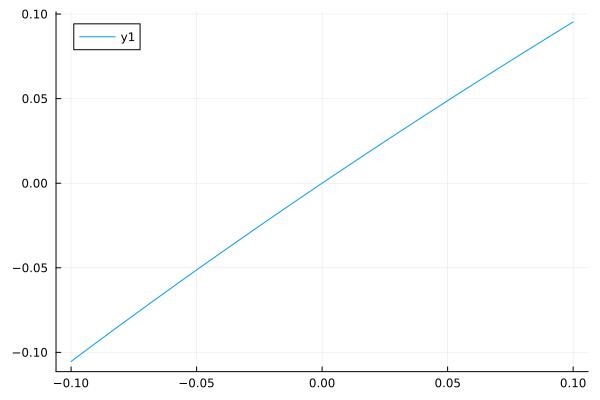

In [3]:
f(x) = [(-1)^(n+1)*(x^n)/n for n in 1:20] |> sum
xx = -0.1:0.001:0.1
plot(xx, f.(xx))

In [4]:
bisection(f, -0.1, 0.2, 1.0e-6)


(1.9073486328125e-7, 18)

In [5]:

f2(x) = x*(x-1.)*(x-2.)+5
df2(x) = 3*x^2-6*x+2
println(newton_method(f2, df2, 1.2))
println(newton_method(f2, df2, 0.0))

(-0.9041608591349207, 24)
(-0.9041608591349207, 7)


In [6]:
sqrt2, _ = bisection(x -> x^2-2, 0.0, 4.0)

(1.4142135605216026, 28)

In [7]:
bisection(x->exp(x)-1.0, -2, 1)

(-1.862645149230957e-9, 28)

In [8]:
f2(x) = x*(x-1.)*(x-2.)+5
df2(x) = 3*x^2-6*x+2
println(newton_method(f2, df2, 0.0))
println(secant(f2, 0.0, 0.1))

(-0.9041608591349207, 7)
(-0.9041608591355101, 10)


(0.7390851321023699

, 27)
(0.739085133385284, 4)
(0.739085133034638, 5)
(0.7390851292482057, 9)


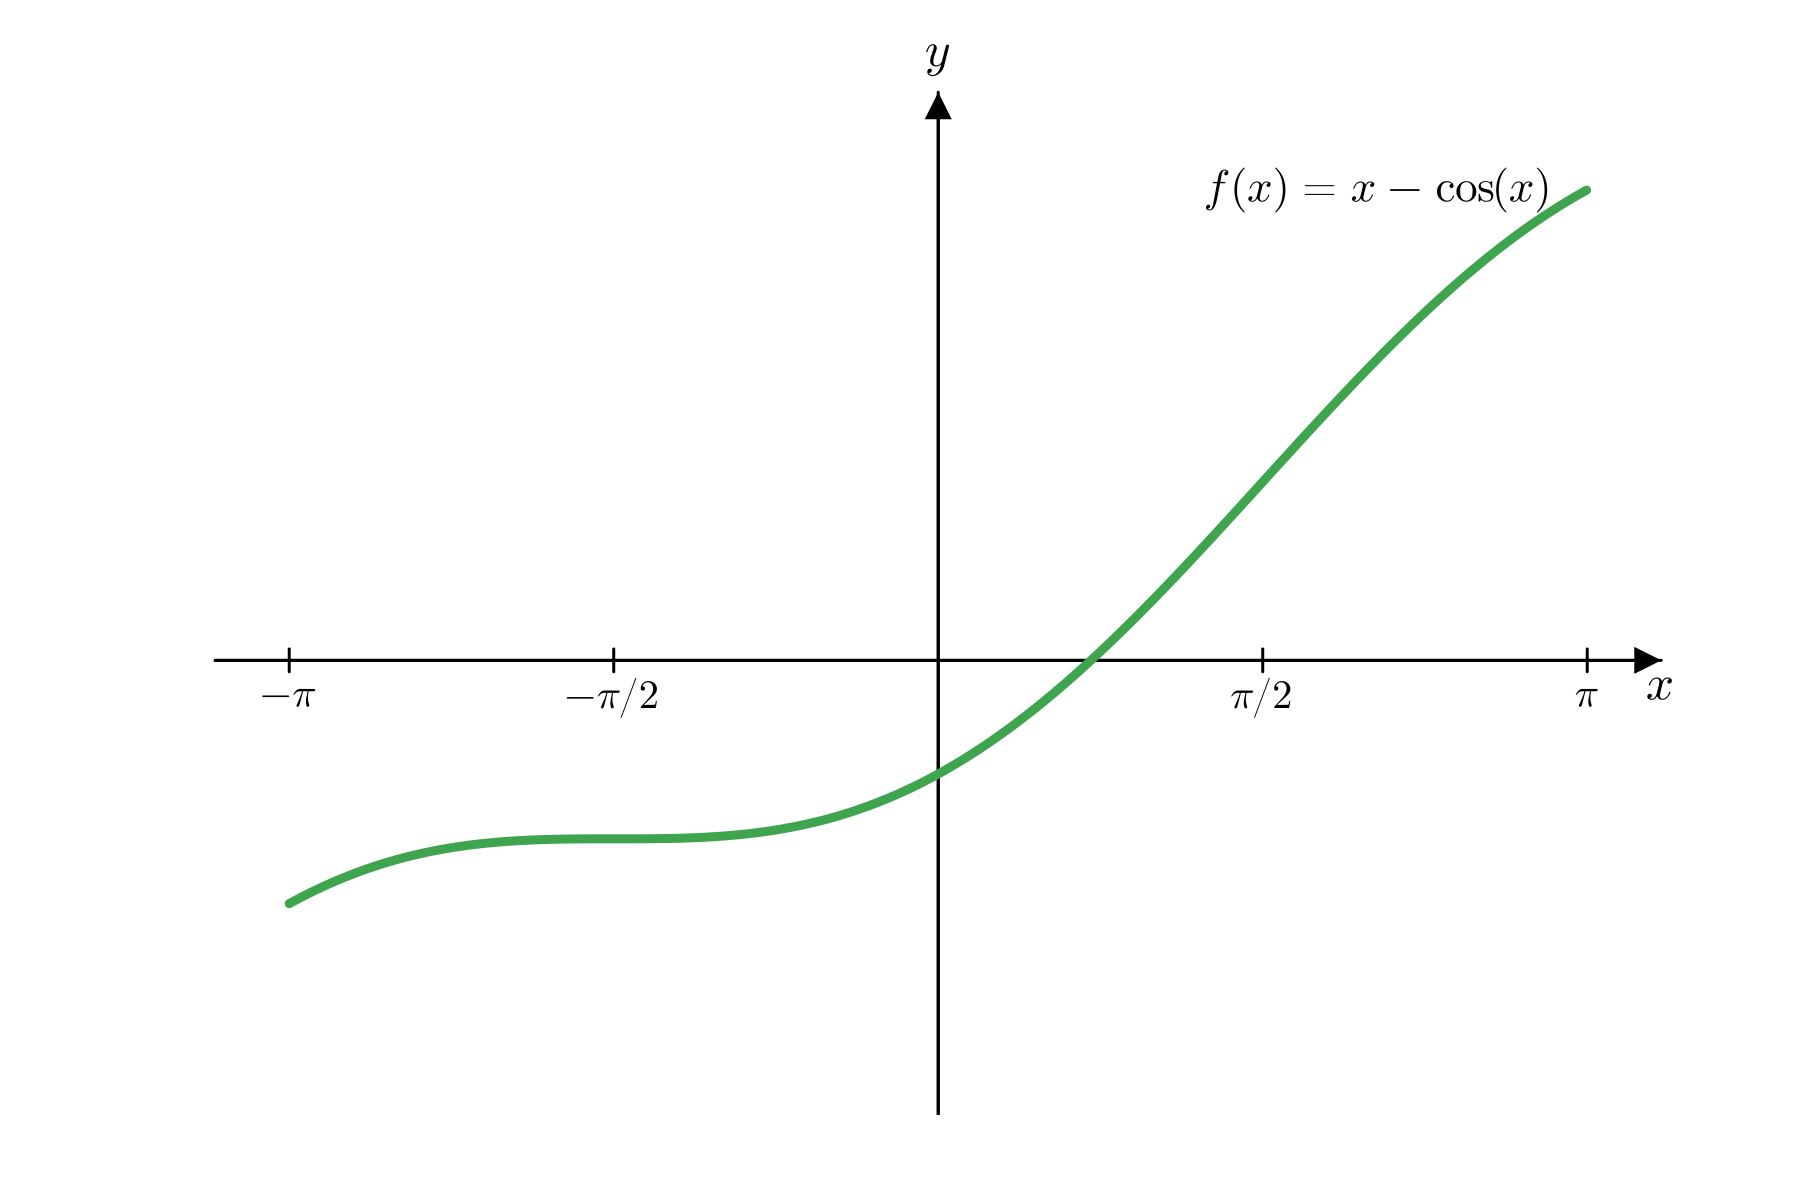

In [9]:
f(x) = x-cos(x)
df(x) = 1+sin(x)
println(bisection(f, 0, π/2))
println(newton_method(f, df, 0.0))
println(secant(f, 0, π/2))
println(regula_falci(f, 0, π/2))

t=-π:0.01:π
plot1 = plot([-3.5, 3.5], [0.0, 0.0], arrow=(:closed, 2), lw=1, lc=:black,  
    frame = :none, label=:none, dpi=300, xlim = (-4, 4), ylim = (-4, 5.5))

plot!([0, 0], [-4, 5], arrow=(:closed, 2), lw=1, lc=:black, label=:none)
plot!(t, f.(t), lw=3, label = :none)


annotate!(t[end]-1, f(t[end]), text(L"f(x)=x-\cos (x)", :black, 10, :center))
annotate!(3.5, -0.25, text(L"x", :black, 11, :center))
annotate!(0, 5.0, text(L"y", :black, 11, :bottom))

xv, xvs =[-π, -π/2, π/2, π], [L"-\pi", L"-\pi/2", L"\pi/2", L"\pi"]

for (i, xs) in enumerate(xv)
    plot!([xs, xs], [-0.1, 0.1], lc=:black, lw=1, label = :none)
    annotate!(xs, -0.1, text(xvs[i], :black, 9, :top))
end
plot(plot1)

In [10]:
bisection(x -> x^2-2, 0.0, 4.0)

(1.4142135605216026, 28)